## EMアルゴリズム
<div style="text-align: right;">
'18/1/13
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

#### データの生成

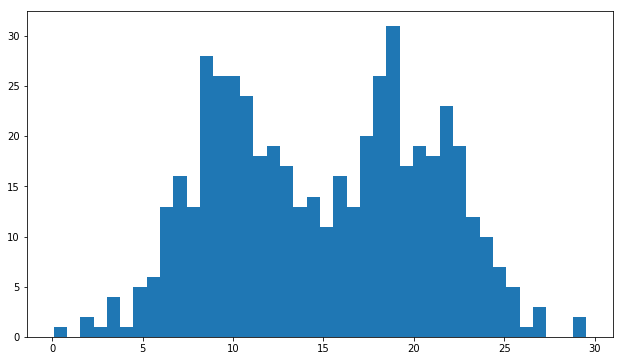

In [18]:
nd1 = np.random.normal(10, 3, (250))
nd2 = np.random.normal(20, 3, (250))

data = np.concatenate([nd1, nd2])

plt.figure(figsize=(10.5,6))
plt.hist(data, bins=40)
plt.show()

#### EMアルゴリズムによる尤度の計算

In [19]:
# ガウス分布の計算（データ，平均，分散）
def gaussian(x, mean, vari):
    return math.exp(- pow(x - mean, 2) / (2 *vari)) / math.sqrt(2 * math.pi *vari)

# Eステップの計算
def e_step(xs, ms, vs, p):
    burden_rates = []
    for x in xs:
        # 負担率の分母と分子の計算
        d = (1-p)*gaussian(x, ms[0], vs[0]) + p*gaussian(x, ms[1], vs[1])
        n = p*gaussian(x, ms[1], vs[1])

        # 負担率の計算
        burden_rate = n/d
        burden_rates.append(burden_rate)
    return burden_rates


# Mステップ
def m_step(xs, p_s):
    # 負担率を使って平均と分散を更新する
    # 正規分布１
    d = sum([1-r for r in burden_rates])
    n = sum([(1-r)*x for x, r in zip(xs, burden_rates)])
    mu1 = n/d

    n = sum([(1-r)*pow(x - mu1, 2) for x, r in zip(xs, burden_rates)])
    var1 = n/d

    # 正規分布２
    d = sum(burden_rates)
    n = sum([r*x for x, r in zip(xs, burden_rates)])
    mu2 = n/d

    n = sum(r*pow(x - mu2, 2) for x, r in zip(xs, burden_rates))
    var2 = n/d

    # piの更新
    N = len(xs)
    p = sum(burden_rates) / N

    return [mu1, mu2], [var1, var2], p


# 対数尤度関数の計算
def calc_log_likelihood(x_s, m_s, v_s, p_s):
    buff = 0
    for x in x_s:
        buff += math.log((1-p_s)*gaussian(x, m_s[0], v_s[0])
                      +p_s*gaussian(x, m_s[1], v_s[1]))
    return buff


# EMアルゴリズムの計算

p_s = 0.5
m_s = [random.choice(data), random.choice(data)]
v_s = [np.var(data), np.var(data)]

# 対数尤度を保存しておくリスト
ls = []

# EMアルゴリズム
for t in range(100):
    # Eステップで負担率を計算する
    burden_rates = e_step(data, m_s, v_s, p_s)

    # MEステップでパラメータを更新する
    m_s, v_s, p_s = m_step(data, burden_rates)
    
    # 対数尤度の計算
    ls.append(calc_log_likelihood(data, m_s, v_s, p_s))

#### 平均と分散

In [20]:
print('mean_1={0}, mean_2={1}, variance_1={2}, variance_2={3}, pi={4}'.format(
    m_s[0], m_s[1], v_s[0], v_s[1], p_s))

mean_1=9.808970526944659, mean_2=19.720756112495792, variance_1=8.75999491517131, variance_2=9.998603285914625, pi=0.5164183991300372


#### 対数尤度の計算

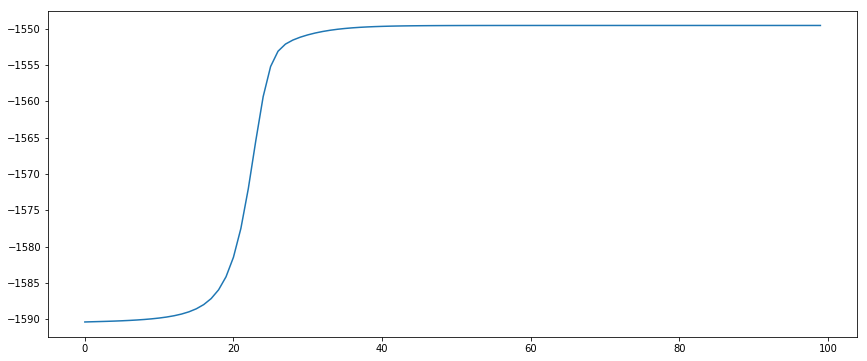

In [21]:
plt.figure(figsize=(14.5,6))
plt.plot(np.arange(len(ls)), ls)
plt.show()